<a href="https://colab.research.google.com/github/Ashraf-Saleh/Fault-Detect/blob/Trial-branch/Fault_Detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [1]:
import numpy
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras 
from keras import layers
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.optimizers import SGD
from keras.layers import Dense, Flatten, Dropout, Activation, BatchNormalization,Concatenate, merge
from keras.utils.np_utils import to_categorical
from keras.models import model_from_json
from keras.utils import plot_model
import tensorflow as tf
import random, os
import multiprocessing as mp
from queue import Empty
import time

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Data_X = numpy.load("/content/drive/My Drive/Colab_Data/Fault_Detect/Train_X_Sample.npy",None,allow_pickle=True)
Data_Y = numpy.load("/content/drive/My Drive/Colab_Data/Fault_Detect/Train_Y_Sample.npy",None,allow_pickle=True)

In [4]:
Train_X = Data_X
Train_Y = Data_Y
#Train_X = Data_X[:int(len(Data_X)*0.4)]
#Train_Y = Data_Y[:int(len(Data_Y)*0.4)]
#Vald_X = Data_X[int(len(Data_X)*0.4):int(len(Data_X)*0.7)]
#Vald_Y = Data_Y[int(len(Data_Y)*0.4):int(len(Data_Y)*0.7)]
#Test_X = Data_X[int(len(Data_X)*0.7):]
#Test_Y = Data_Y[int(len(Data_Y)*0.7):]
''' 
print(Data_X.shape)
print(Train_X.shape)
print(Vald_X.shape)
print(Test_X.shape)

print(Data_Y.shape)
print(Train_Y.shape)
print(Vald_Y.shape)
print(Test_Y.shape)
'''
print(Data_X.shape)
print(Data_Y.shape)

(22950, 5, 5000, 1)
(22950, 9)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data (InputLayer)            [(None, 5, 5000, 1)]      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 2451, 100)      50100     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 245, 100)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 1, 118, 50)        50050     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 14, 50)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 1, 3, 50)          25050     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 50)          0     

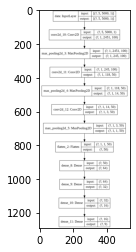

In [15]:
inputs = keras.Input(shape = (Train_X.shape[1], Train_X.shape[2], Train_X.shape[3]), name="data")
 
x = layers.Conv2D(filters = 100, kernel_size = (5, 100),strides=(1, 2), activation = "relu") (inputs)

x = layers.MaxPooling2D(pool_size = (1,10)) (x)
x = layers.Conv2D(filters = 50, kernel_size = (1,10),strides = (1, 2),padding = 'valid', activation='relu') (x)

x = layers.MaxPooling2D(pool_size = (1,8)) (x)
x = layers.Conv2D(filters = 50,kernel_size= (1, 10),strides = (1, 2), activation="relu")(x)

x = layers.MaxPooling2D(pool_size = (1,3))(x)

#x = layers.Conv2D(filters = 50,kernel_size= (1, 10),strides = (1, 2), activation="relu")(x)

#x = layers.AveragePooling2D(pool_size = (1,4))(x)
#x = layers.Conv2D(filters = 25,kernel_size= (1, 10),strides = (1, 1), activation="relu")(x)
#x = layers.AveragePooling2D(pool_size = (1,4))(x)

'''
x = layers.Conv2D(filters = 21, kernel_size = (3, 100), activation='relu') (inputs)
block_1_output = layers.MaxPooling2D(pool_size = (1,4)) (x)
 
x = layers.Conv2D(filters = 11, kernel_size = (2, 200), activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(filters = 21, kernel_size = (2, 20), activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])
 
 
x = layers.Conv2D(filters = 21,kernel_size= (1, 50), activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(filters = 21,kernel_size= (1, 70), activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])
 
 
x = layers.Conv2D(filters = 11, kernel_size = (2, 20), activation="relu", padding="same")(block_3_output)
x = layers.Conv2D(filters = 21, kernel_size = (2, 20), activation="relu", padding="same")(x)
 
block_6_output = layers.add([x, block_3_output])
 
x = layers.Conv2D(filters = 21,kernel_size= (1, 20), activation="relu", padding="same")(block_6_output)
x = layers.Conv2D(filters = 21,kernel_size= (1, 20), activation="relu", padding="same")(x)
block_7_output = layers.add([x, block_6_output])
 
x = layers.MaxPooling2D(pool_size = (1,4)) (block_7_output) 
 '''
x = layers.Flatten()(x) 
 
 
x = layers.Dense(64, activation="relu")(x)
#x = layers.Dense(58, activation="relu")(x)
#x = layers.Dense(52, activation="relu")(x)
#x = layers.Dense(46, activation="relu")(x)
#x = layers.Dense(40, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
#x = layers.Dense(28, activation="relu")(x)
#x = layers.Dense(22, activation="relu")(x)
#block_4_output = layers.Dense(16, activation="relu")(x)
 
#x = layers.Dense(16, activation="relu")(block_4_output)
#x = layers.Dense(16, activation="relu")(x)
x = layers.Dense(16, activation="relu")(x)
#block_5_output = layers.add([x, block_4_output])
 
#x = block_5_output
#x = layers.Dropout(0.5)(x)
outputs = layers.Dense(Train_Y.shape[1], activation='softmax')(x)
 
 
model = keras.Model(inputs, outputs, name="model")
 
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])
 
model.summary()
plot_model(model, to_file='/content/drive/My Drive/Colab_Data/Fault_Detect/model.png',show_shapes=True)
plt.imshow(mpimg.imread('/content/drive/My Drive/Colab_Data/Fault_Detect/model.png'))

In [16]:
history = model.fit(Train_X, Train_Y, epochs=1000,batch_size = 200, verbose=2)#, validation_data=(Vald_X,Vald_Y))

Epoch 1/1000
115/115 - 4s - loss: 0.7878 - accuracy: 0.5961
Epoch 2/1000
115/115 - 4s - loss: 0.4782 - accuracy: 0.7227
Epoch 3/1000
115/115 - 4s - loss: 0.4336 - accuracy: 0.7633
Epoch 4/1000
115/115 - 4s - loss: 0.3694 - accuracy: 0.7959
Epoch 5/1000
115/115 - 4s - loss: 0.3236 - accuracy: 0.8285
Epoch 6/1000
115/115 - 4s - loss: 0.2581 - accuracy: 0.8699
Epoch 7/1000
115/115 - 4s - loss: 0.2169 - accuracy: 0.8945
Epoch 8/1000
115/115 - 4s - loss: 0.1921 - accuracy: 0.9040
Epoch 9/1000
115/115 - 4s - loss: 0.1901 - accuracy: 0.9021
Epoch 10/1000
115/115 - 4s - loss: 0.1467 - accuracy: 0.9244
Epoch 11/1000
115/115 - 4s - loss: 0.1418 - accuracy: 0.9261
Epoch 12/1000
115/115 - 4s - loss: 0.1654 - accuracy: 0.9173
Epoch 13/1000
115/115 - 4s - loss: 0.1244 - accuracy: 0.9349
Epoch 14/1000
115/115 - 4s - loss: 0.1218 - accuracy: 0.9362
Epoch 15/1000
115/115 - 4s - loss: 0.1171 - accuracy: 0.9385
Epoch 16/1000
115/115 - 4s - loss: 0.1117 - accuracy: 0.9397
Epoch 17/1000
115/115 - 4s - loss

In [17]:
#Test_X,Test_Y = prepare_test_data()

#Test_Y_1 = to_categorical(Test_Y)
Train_Y_1 = to_categorical(Train_Y)
#print(Test_X.shape)
#print(Test_Y.shape)
#print(to_categorical(Test_Y).shape)
print(Train_Y.shape)
print(to_categorical(Train_Y).shape)

(22950, 9)
(22950, 9, 2)


In [18]:
from numpy import argmax
from numpy import random
print ('Training ',model.metrics_names,' = ',model.evaluate(Train_X, Train_Y, verbose=0))
#print ('Testing  ', model.metrics_names,' = ',model.evaluate(Test_X, Test_Y, verbose=0))
#print ('true (Test)     \n',Test_Y[:10].astype('int'))
#print ('predicted (Test)\n',model.predict(Test_X[:10]).astype('int'))

print ('true (Train)     \n',Train_Y[:10].astype('int'))    
print ('predicted (Train)\n', model.predict(Train_X[:10]).astype('int'))     #make random check: Test_X*0.0090, random.shuffle(Test_X), Test_X*random.random()*0.05            
print (model.summary())
 
 
#numpy.savetxt('/content/gdrive/My Drive/Colab Notebooks/test_data/fileO.csv',model.predict(Test_X),delimiter=',')

Training  ['loss', 'accuracy']  =  [0.0548161081969738, 0.9699782133102417]
true (Train)     
 [[0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]]
predicted (Train)
 [[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]]
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data (InputLayer)            [(None, 5, 5000, 1)]      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 2451, 100)      50100     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 245, 100)     

dict_keys(['loss', 'accuracy'])


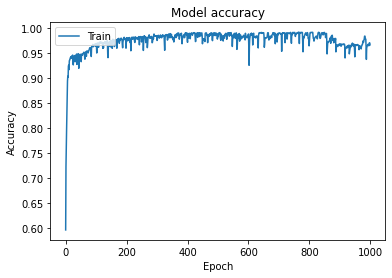

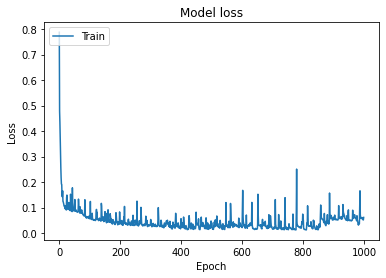

In [19]:
#Plot the model
 
plot_model(model, to_file='model.png', show_shapes = True, show_layer_names = True)
 
print(history.history.keys())
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
 
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#print (model.predict_classes(Test_X[:1,]))
#model.save('my_model.h5')
#Test_X[0]